## Mathplotlib Plots
In this notebook, we aim to get familiar with plotting using Matplotlib. For application in photonic computation, we also introduce the complex notation to facilitate manipulation of fields.

A **field** can be think of spatial distribution of a physical quantity. If a real number is sufficient to describe this physical quantity (e.g., temperature, preasure, potential), we refer to a **scalar field**. If a vector is needed (2- or 3-element vector describing the magnitude and the direction in space, e.g., flow of fluids, electric and magnetic field), we refer to a **vector field**. These fields might vary in time. If a field is time-independent, we talk about a **static** field. A field is just like a mathematical function, for example:

$ V(x,y,z): \mathbb{R}^3 \rightarrow \mathbb{R}$ describes a spatial distribution of electrostatic potential \
$ T(x,y,z,t): \mathbb{R}^3\times\mathbb{R} \rightarrow \mathbb{R} $ describes a time-varying temperature distribution \
$ \mathbf{E}(x,y,z,t): \mathbb{R}^3\times\mathbb{R} \rightarrow \mathbb{R}^3 $ describes the spatial distribution of a time-varying electric field

In photonic simulation (think of light as electromagnetic wave), we generally focus on calculating electric field (in most case, the materials used in optics are non-magnetic, linear and isotropic). If the time-dependent term of electric field is sinusoidal (i.e. **harmonic** osillation): $E_0 \text{cos}(-(\omega t - \phi))$, we make use of the complex notation $E_c = E_0\text{exp}(-j(\omega t -\phi)) = E_0 \text{e}^{j\phi} \text{e}^{-j\omega t}$ to describe the field and keep in mind that the physical field is the real part of $E_c$. Any linear operation applied on the real field is equivalent to the same operation applied on the complex field and take the real part at the end. If the context is clear, we may omit the time-harmonic term $\text{e}^{-j\omega t}$ and use the same $\mathbf{E}$ notation for complex field:

$ \mathbf{E}: \mathbb{R}^3 \rightarrow \mathbb{C}^3 $ describes the spatial distribution of a time-harmonic electric field

Bold font is generally referred to as vectors, normal font as scalars. $\mathbf{E} = [E_x, E_y, E_z]$ denote the three components of electric field. Its spatial dependence is written as a function of spatial coordinates: $\mathbf{E}(x,y,z) = [E_x(x,y,z), E_y(x,y,z), E_z(x,y,z)]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use("./presentation.mplstyle")  # Use a predefined style sheet
cmap = mpl.colormaps["winter"]  # Used later as set of continuous colors

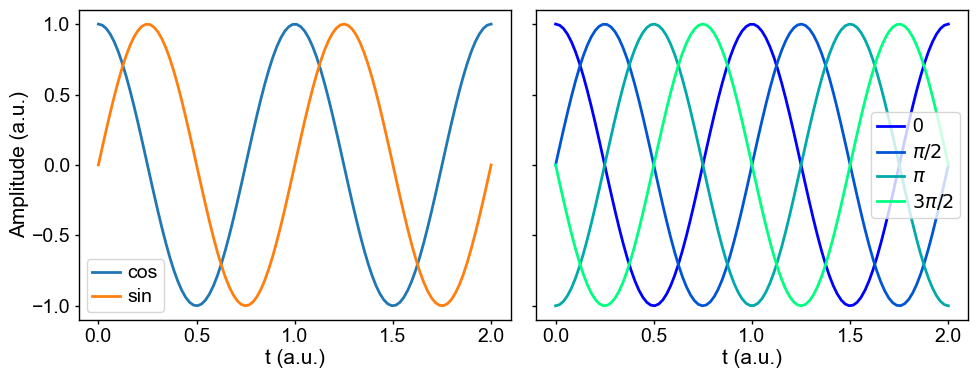

In [2]:
## Example 1D plots 
t = np.linspace(0, 2, 100)  # Plot for two periods of oscillation
omega = 2*np.pi  # omega = 2*pi*frequency
A1 = np.cos(omega*t)
A2 = np.sin(omega*t)
A_complex = np.exp(-1j*omega*t)
phases = [0, np.pi/2, np.pi, np.pi*3/2]
labels = ['0', r"$\pi/2$", r"$\pi$", r"$3\pi/2$"]
colors = cmap(np.linspace(0,1,4))

fig, axs = plt.subplots(1,2, sharey=True, figsize=(10,4))
axs[0].plot(t, A1, label="cos")
axs[0].plot(t, A2, label="sin")
axs[0].set(xlabel="t (a.u.)", ylabel="Amplitude (a.u.)")
axs[0].legend()

for i, phase in enumerate(phases):
    A_real = np.real(A_complex*np.exp(1j*phase))  # Multiply the exponential of phase offset then take the real part
    axs[1].plot(t, A_real, label=labels[i], color=colors[i])
axs[1].set(xlabel="t (a.u.)")
axs[1].legend()
fig.tight_layout()

## Interference

[Intensity of the Double Slit Experiment](https://lampz.tugraz.at/~hadley/physikm/script/waves/interferenceintensity2d2.en.php)

[Young's Double-Slit Interference](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/03%3A_Interference/3.02%3A_Young's_Double-Slit_Interference)

Considering two slits separated by a distance $d$, they emit coherent light that interfere. The intensity is measured on a screen placed far from the slits (alternatively, a distance $L$ from the slits). For two parallel light beams (that interfere at infinity) propagating at an angle $\theta$ to the optical axis, the differenct optical path is $d\:\mathrm{sin}(\theta)$. We can write the complex amplitude of the two light beams:
$$ E_1 = E_0\:\text{exp}\left( j\frac{2\pi}{\lambda} \frac{d}{2}\:\text{sin}(\theta) \right) $$
$$ E_2 = E_0\:\text{exp}\left(-j\frac{2\pi}{\lambda} \frac{d}{2}\:\text{sin}(\theta) \right) $$
The resulting field (sum of the complex amplitudes) is:
$$ E = E_1 + E_2 = 2\:E_0\:\text{cos} \left( \frac{2\pi}{\lambda} \frac{d}{2}\:\text{sin}(\theta) \right) $$

Optical power or intensity (time-averaged):
$$ I \propto |E|^2 = I_0\:\text{cos}^2 \left( \frac{2\pi}{\lambda} \frac{d}{2}\:\text{sin}(\theta) \right) $$

At the center position ($\theta=0$), we have the maximum intensity. Away from the center position, the intensity decreases and increases again to reach the maximum intensity at $\text{sin}(\theta) = \frac{\lambda}{d}$. This is translated to a fringe spacing of
$$ L\text{sin}(\theta) = \frac{L\lambda}{d} $$
for a screen placed at a finite distance $L$ away from the slits.

Fringe spacing: 1.575 mm


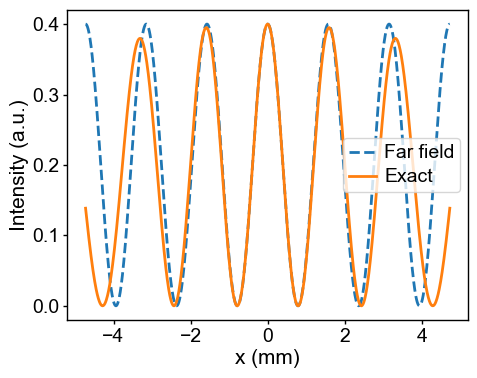

In [6]:
## Example 1D plots
wavelength = 0.63e-3  # 630 nm to mm
d = 4e-3  # Slit separation in mm
L = 10  # Distance to the screen in mm
dx = L*wavelength/d  # Fringe spacing (constructive interference: diff optical path = wavelength)
print(f"Fringe spacing: {dx:.4g} mm")

x = 3*np.linspace(-1,1,1000)*dx  # Plot for roughly 3+3=6 fringes
r1 = np.sqrt(L**2 + (x - d/2)**2)  # Distance from slit1 to the point of observation
r2 = np.sqrt(L**2 + (x + d/2)**2)  # Distance from slit2 to the point of observation
dr = d/L*x  # Approximate different optical path

k = 2*np.pi/wavelength
amplitude = np.exp(1j*k*r1)/np.sqrt(r1) + np.exp(1j*k*r2)/np.sqrt(r2) 
intensity = np.abs(amplitude)**2  # Time-averaged intensity is proportional to abs amplitude square
intensity_approx = 4/L * np.cos(k*dr/2)**2

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x, intensity_approx, ls='--', label="Far field")
ax.plot(x, intensity, label="Exact")
ax.set(xlabel="x (mm)", ylabel="Intensity (a.u.)")
ax.legend()
fig.tight_layout()

## Diffraction
[Single slit diffraction](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/04%3A_Diffraction/4.02%3A_Single-Slit_Diffraction)

Considering a slit (thin aperture) of width $a$:
$$ A(x) = \begin{cases}
1, & \text{if $|x|<a$}. \\
0, & \text{otherwise}.
\end{cases} $$
At far field, wave from a small point source at $x$, propagating with an angle $\theta$ to the optical axis, can be written as  
$$ dE \propto \frac{E_0}{r} \mathrm{exp} \left( j \frac{2\pi}{\lambda} \mathrm{sin}(\theta) x \right) dx $$
We define the wavevector with magnitude $k = \frac{2\pi}{\lambda}$ and direction pointing to the propagation direction of light wave. Then the term in the exponential equals $\vec{k}\cdot\vec{x}$ corresponding to a phase offset.

The total field as coherent superposition of these small element of field is expressed as:
$$ E \propto \int_{-a/2}^{a/2} e^{j k \mathrm{sin}(\theta) x} dx =  \frac{a}{2} \mathrm{sinc}\left( \frac{ka}{2}\mathrm{sin(\theta)}\right)$$
where 
$$ \mathrm{sinc}(x)=\frac{\mathrm{sin}(x)}{x} $$
is the cardinal sine function, which tends to 1 when $x$ tends to 0.

Finally, we have intensity
$$ I \propto \mathrm{sinc}^2 \left( \frac{ka}{2}\mathrm{sin}(\theta) \right) $$

Note that
$$ \int_{-\infty}^{\infty} A(x) e^{jk_x x} dx $$
is the spatial Fourier transform of the apperture function $A$.

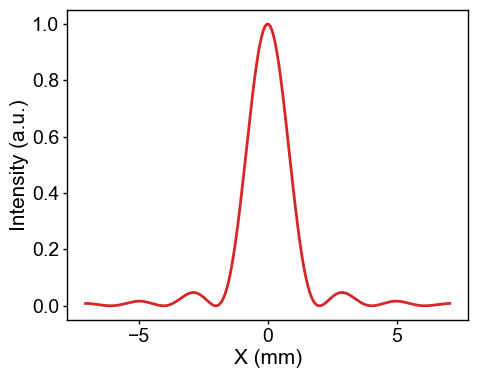

In [8]:
wavelength = 0.63e-3  # 630 nm to mm
a = 4e-3  # Slit width in mm
focal = 40  # Use a lens with finite focal length (in mm) to project far field on a screen
theta = np.linspace(-10,10,1000) * np.pi/180  # Angle in radians

k = 2*np.pi/wavelength
X = focal*np.tan(theta)  # Dimension on the screen
intensity = np.sinc(k*a/2*np.sin(theta))**2

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X, intensity, color="tab:red")
ax.set(xlabel="X (mm)", ylabel="Intensity (a.u.)")
fig.tight_layout()

For a 2D rectangular slit of size $a$ in the x-direction and size $b$ in the y-direction, the same calculated can be extended.
$$ A(x,y) = \begin{cases}
1, & \text{if $|x|< a$ and $|y| < b$}. \\
0, & \text{otherwise}.
\end{cases} $$

Let wavevector $k$ pointing to the direction forming an angle $\alpha$ (in the x-z plane) and angle $\beta$ (in the y-z plane) to the optical axis (z-axis).
$$ k = \frac{2\pi}{\lambda} $$
The 2D Fourier transform of the aperture function is:
$$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} A(x,y) \text{exp} \left( j(\vec{k}\cdot\vec{x} + \vec{k}\cdot\vec{y}) \right) dx dy $$
The electric field element diffracted at angle $\alpha$ and $\beta$ to the optical axis:
$$ dE \propto \text{exp} \left( j \frac{2\pi}{\lambda} (\text{sin}(\alpha) x + \text{sin}(\beta) y) \right) dx dy $$
Integrate $dE$ over $x = -a/2$ to $a/2$ and $y = -b/2$ to $b/2$ yields:
$$ E \propto \text{sinc} \left( \frac{ka}{2}\text{sin}(\alpha) \right) \times \text{sinc} \left( \frac{kb}{2}\text{sin}(\beta) \right)$$

We can plot in 2D the spatial distribution of light intensity, assumimg the screen is placed at distance $L$ far from slit, or using a lens of focal length $F$ to project the diffracted pattern at infinity to the focal plane of the lens.

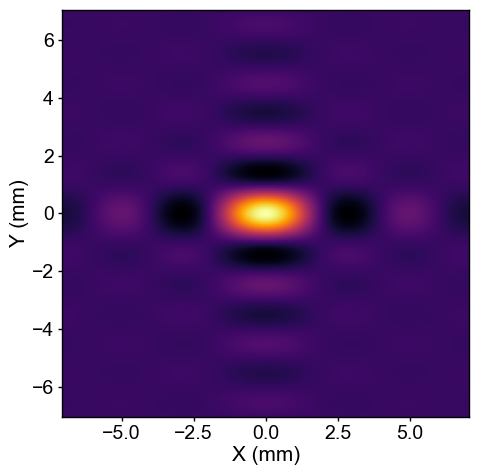

In [9]:
wavelength = 0.63e-3  # 630 nm to mm
a = 4e-3  # Slit width in mm
b = 8e-3  # Slit height in mm
focal = 40  # Use a lens with finite focal length (in mm) to project far field on a screen

k = 2*np.pi/wavelength
alpha = np.linspace(-10,10,200) * np.pi/180  # Angle in radians
beta = np.linspace(-10,10,200) * np.pi/180  # Angle in radians
[AA, BB] = np.meshgrid(alpha, beta)
X = focal*np.tan(alpha)  # Dimension X on the screen
Y = focal*np.tan(beta)  # Dimension Y on the screen

field = np.sinc(k*a/2*np.sin(AA)) * np.sinc(k*b/2*np.sin(BB))

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(field, cmap="inferno", extent=[X.min(),X.max(),Y.max(),Y.min()])
ax.invert_yaxis()
ax.set(xlabel="X (mm)", ylabel="Y (mm)")
fig.tight_layout()

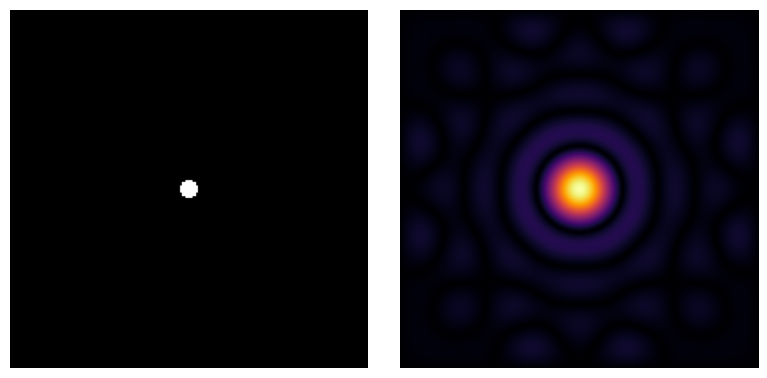

In [14]:
n = 100
x = np.linspace(-1,1,2*n)
y = np.linspace(-1,1,2*n)
radius = 0.05

[X, Y] = np.meshgrid(x, y)
Aperture = np.zeros((len(y), len(x)))
Aperture[X**2 + Y**2 <= radius**2] = 1

E = np.fft.fft2(Aperture, s=(len(y), len(x)))  # Fast Fourier Transform
Ecentered = np.vstack((E[n+1:], E[:n]))  # Bring the low spatial frequencies to center
Ecentered = np.hstack((Ecentered[:, n+1:], Ecentered[:, :n]))
Eabs = np.abs(Ecentered)

fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].imshow(Aperture, cmap="gray")
axs[0].invert_yaxis()
axs[0].axis("off")
axs[1].imshow(Eabs, cmap="inferno")
axs[1].invert_yaxis()
axs[1].axis("off")
fig.tight_layout()